In [1]:
import numpy as np
from matplotlib import pyplot as plt
import py_gauge_mc
import os
from tqdm.notebook import tqdm

In [2]:
def make_graph(l, inv_ks,vlen=100):
    vn = np.einsum('i,j->ij', inv_ks, np.arange(vlen)**2)
    graph = py_gauge_mc.GPUGaugeTheory(l,l,l,l,vn.astype(np.float32))
    return graph

In [3]:
inv_ks = np.linspace(0.1,1.0,64)

In [4]:
graph = make_graph(8, inv_ks)
graph.simulate(steps=100,local_updates_per_step=10)
w_v = graph.simulate_and_get_winding_variance(1000,local_updates_per_step=10,steps_per_sample=100)

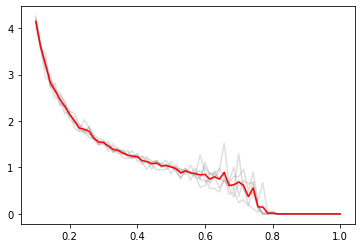

In [5]:
for i in range(w_v.shape[-1]):
    plt.plot(inv_ks, w_v[:,i], c='gray', alpha=0.25)

plt.plot(inv_ks, w_v.mean(axis=-1), c='red')

In [6]:
graph = make_graph(8, inv_ks)
graph.simulate(steps=100,local_updates_per_step=10,run_parallel_tempering=True)
w_v_par = graph.simulate_and_get_winding_variance(1000,local_updates_per_step=10,steps_per_sample=100,run_parallel_tempering=True)

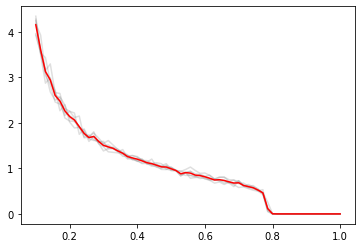

In [7]:
for i in range(w_v_par.shape[-1]):
    plt.plot(inv_ks, w_v_par[:,i], c='gray', alpha=0.25)

plt.plot(inv_ks, w_v_par.mean(axis=-1), c='red')

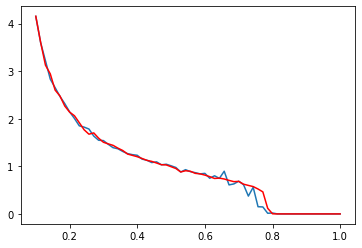

In [8]:
plt.plot(inv_ks, w_v.mean(axis=-1))
plt.plot(inv_ks, w_v_par.mean(axis=-1), c='red')

In [9]:
graph.get_parallel_tempering_success_rate()

[0.0,
 0.0,
 0.0,
 3.996003996003996e-05,
 0.0003196803196803197,
 0.000979020979020979,
 0.0022177822177822178,
 0.0036563436563436563,
 0.006233766233766234,
 0.00977022977022977,
 0.013666333666333666,
 0.01754245754245754,
 0.022737262737262738,
 0.029810189810189812,
 0.035244755244755246,
 0.04073926073926074,
 0.04919080919080919,
 0.05448551448551449,
 0.06025974025974026,
 0.06953046953046953,
 0.07786213786213786,
 0.08565434565434565,
 0.08837162837162837,
 0.09736263736263737,
 0.10545454545454545,
 0.1143056943056943,
 0.12161838161838162,
 0.1284915084915085,
 0.13558441558441559,
 0.13854145854145855,
 0.14535464535464535,
 0.15476523476523477,
 0.15912087912087913,
 0.1662137862137862,
 0.1662937062937063,
 0.17262737262737263,
 0.17252747252747253,
 0.17534465534465535,
 0.17642357642357642,
 0.17274725274725275,
 0.17196803196803198,
 0.16805194805194806,
 0.16171828171828173,
 0.15232767232767233,
 0.13538461538461538,
 0.11564435564435564,
 0.07700299700299701,
 0.0